In [49]:
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [50]:
X_data = pd.read_csv('C:\\Users\\sangy\\Desktop\\PythonWorkspace\\잡잡\\total_data_1040features.csv')
total_mean_data = X_data.copy()
y_data = X_data['Label']

for i in X_data.columns:
    total_mean_data[i] = total_mean_data[i].fillna(total_mean_data[i].mean())
    
y_data.shape

(4755,)

In [ ]:
final_mean_data = X_data.drop(['Label'], axis=1)

In [52]:
sc = StandardScaler()
csv_scaled = sc.fit_transform(total_mean_data)
csv_scaled_df = pd.DataFrame(csv_scaled)

In [ ]:
kmeans = KMeans(n_clusters= 30, random_state=0)
clusters = kmeans.fit(csv_scaled)

csv_scaled_df['cluster'] = clusters.labels_

In [ ]:
tsne_np = TSNE(n_components=2).fit_transform(csv_scaled)

tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
tsne_df['cluster'] = csv_scaled_df['cluster']

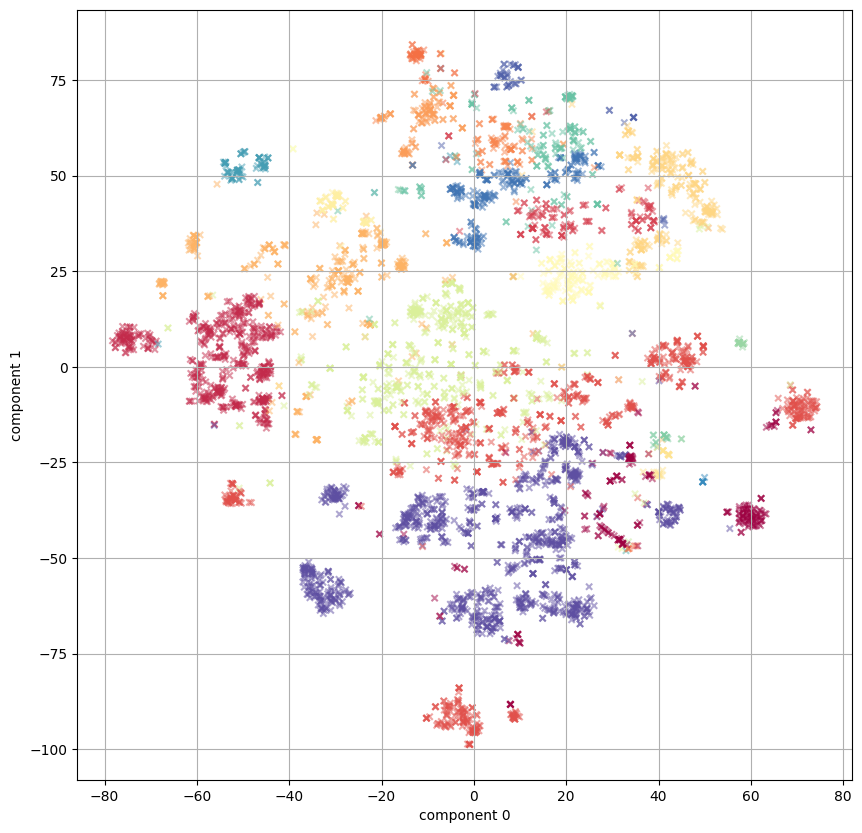

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_df['component 0'], tsne_df['component 1'], alpha=0.5, s= 20, c=tsne_df['cluster'], cmap='Spectral', marker='x')
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.grid()
plt.show()

In [64]:
y_data = tsne_df['cluster']
y_data

0        4
1        0
2        9
3        4
4        0
        ..
4750    18
4751    23
4752     4
4753    29
4754    29
Name: cluster, Length: 4755, dtype: int32